#### Author: Alen Pavlovic
The University of Chicago, MasterTrack Certificate - Machine Learning for Analytics

#### Problem Statement and Objective

Property value predictions play a crucial role in real estate markets, taxation systems, and urban planning. Accurately predicting a home's value can help homeowners understand their property's worth, assist tax authorities in levy appropriate taxes, and guide potential buyers or sellers in making informed decisions. Additionally, predicting the likelihood of a homeowner appealing against a tax assessment can help tax authorities prepare and streamline their dispute resolution processes.

In this project, we dive into a dataset derived from the tax assessor's office. Our primary objectives revolve around two main tasks:

- Predicting home values.
- Determining whether a homeowner will appeal their property assessment. By developing accurate prediction models for these tasks, we aim to provide valuable insights that can aid homeowners and the assessor's office alike.

Our machine-learning pipeline comprises several stages: data preprocessing, feature selection, and modeling. We've chosen this pipeline to ensure that the data fed into the model is of high quality and relevance, thereby increasing the chances of model accuracy.

#### Methodology

Predictive modeling serves as the backbone of this analysis. Instead of focusing on the underlying relationships between variables (as in inferential statistics), our primary goal is to train a model using historical data that can predict future outcomes with high accuracy. This predictive capability can then be leveraged for various practical applications, from setting property prices to planning tax assessment appeals.

In [52]:
# Import the necessary library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report, roc_auc_score

# ignore warnings as part of the run process
import warnings
warnings.filterwarnings("ignore")

In [2]:
print(sklearn.__version__)

1.3.0


In [3]:
# Load the data into a pandas dataframe
df = pd.read_csv('project3data.csv')
df.head()

,pin10,taxyear,pin14,tract2010,community,spmap_census2010_id,spmap_community_id,tri,class,major_class,...,avg_school_score,rating_med,dist_med,numreviews_med,rating_med_5,numreviews_med_5,dist_med_5,numreviews_med_lessthan1km,dist_med_lessthan1k,in_state
0,1007102004,2015,1.007100e+13,808600.0,999.0,106.0,NaN,2,204,4,...,7,4.5,1511.060579,352.5,4.5,150,1700.320633,NaN,NaN,1
1,1007104004,2015,1.007100e+13,808600.0,999.0,106.0,NaN,2,203,4,...,7,4.5,1511.060579,321.5,4.5,148,543.043422,149.0,338.698698,1
2,1007104005,2013,1.007100e+13,808600.0,999.0,106.0,NaN,2,208,3,...,7,4.5,1511.060579,321.5,4.5,150,1558.641154,NaN,NaN,1
3,1007104007,2014,1.007100e+13,808600.0,999.0,106.0,NaN,2,203,3,...,7,4.5,1511.060579,353.0,4.5,150,1727.767828,140.0,911.562546,1
4,1007104013,2015,1.007100e+13,808600.0,999.0,106.0,NaN,2,203,4,...,7,4.5,1511.060579,112.5,4.0,80,871.240855,105.0,793.536029,1


The dataset, sourced from the local tax assessor's database, serves as a comprehensive record of property assessments. Each row in this dataset represents an individual property, detailing various attributes ranging from its physical characteristics to its assessment history. At a glance, columns such as 'lot', 'land_value', and 'neighborhood' provide a glimpse into the diverse nature of the information available.

In [4]:
df_dict =  pd.read_csv('project3datadict.csv', encoding="ISO-8859-1")
df_dict.head()

,Variable Name,Variable Definition
0,pin14,Property Index Number
1,pin10,First 10 digits of pin corrosponding to buildings
2,tract2010,2010 census tract
3,community,Chicago community area
4,spmap_census2010_id,Mapping variable for 2010 census tracts


In [5]:
df.describe(include = 'all')

,pin10,taxyear,pin14,tract2010,community,spmap_census2010_id,spmap_community_id,tri,class,major_class,...,avg_school_score,rating_med,dist_med,numreviews_med,rating_med_5,numreviews_med_5,dist_med_5,numreviews_med_lessthan1km,dist_med_lessthan1k,in_state
count,4.700100e+04,47001.000000,4.700100e+04,46996.000000,46996.000000,46995.000000,22147.000000,47001.000000,47001.000000,47001.000000,...,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,42863.000000,42863.000000,47001.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.835204e+09,2013.958001,1.835205e+13,598467.690484,542.578645,1417.038323,37.904502,1.947746,219.045276,3.315078,...,5.702432,4.089445,1511.060875,329.983596,4.026138,229.049595,808.177678,246.382509,422.459247,0.966596
std,6.127672e+08,0.819796,6.127670e+12,303142.229180,483.748091,711.346725,21.659736,0.950136,28.926879,0.466335,...,2.286176,0.278187,0.000192,388.975604,0.363820,279.238944,486.071282,306.487120,235.144204,0.179690
min,1.007102e+09,2013.000000,1.007100e+13,10100.000000,1.000000,91.000000,1.000000,1.000000,201.000000,2.000000,...,1.000000,2.000000,1511.060579,2.000000,1.500000,1.000000,26.073530,1.000000,1.157055,0.000000
25%,1.328109e+09,2013.000000,1.328110e+13,241600.000000,22.000000,867.000000,19.000000,1.000000,203.000000,3.000000,...,4.000000,4.000000,1511.060579,92.500000,4.000000,68.000000,478.198774,66.000000,235.482050,1.000000
50%,1.629226e+09,2014.000000,1.629230e+13,810502.000000,999.000000,1372.000000,34.000000,2.000000,205.000000,3.000000,...,6.000000,4.000000,1511.061000,211.500000,4.000000,129.000000,710.259421,127.000000,386.776800,1.000000
75%,2.401208e+09,2015.000000,2.401210e+13,823002.000000,999.000000,1890.000000,58.000000,3.000000,211.000000,4.000000,...,8.000000,4.250000,1511.061000,362.000000,4.000000,252.000000,1037.030000,263.000000,580.480000,1.000000


In [6]:
# Shape of the data
shape_data = df.shape

# Data types 
data_types = df.dtypes

display(shape_data, data_types)

(47001, 100)

pin10                           int64
taxyear                         int64
pin14                         float64
tract2010                     float64
community                     float64
                               ...   
numreviews_med_5                int64
dist_med_5                    float64
numreviews_med_lessthan1km    float64
dist_med_lessthan1k           float64
in_state                        int64
Length: 100, dtype: object

- Shape of the Data: Rows: 47,001; Columns: 100
  
- Data Types: The dataset contains a mix of data types, including integers (int64), floating-point numbers (float64), and strings (object). Each type corresponds to different kinds of variables, like categorical, continuous, and identifiers.
  
- Missing Values: Several columns have missing values. For instance, tract2010 and community each have 5 missing values, while numreviews_med_lessthan1km and dist_med_lessthan1k have 4,138 missing values each.

In [8]:
df['appeal_flag'].value_counts()

0    42104
1     4897
Name: appeal_flag, dtype: int64

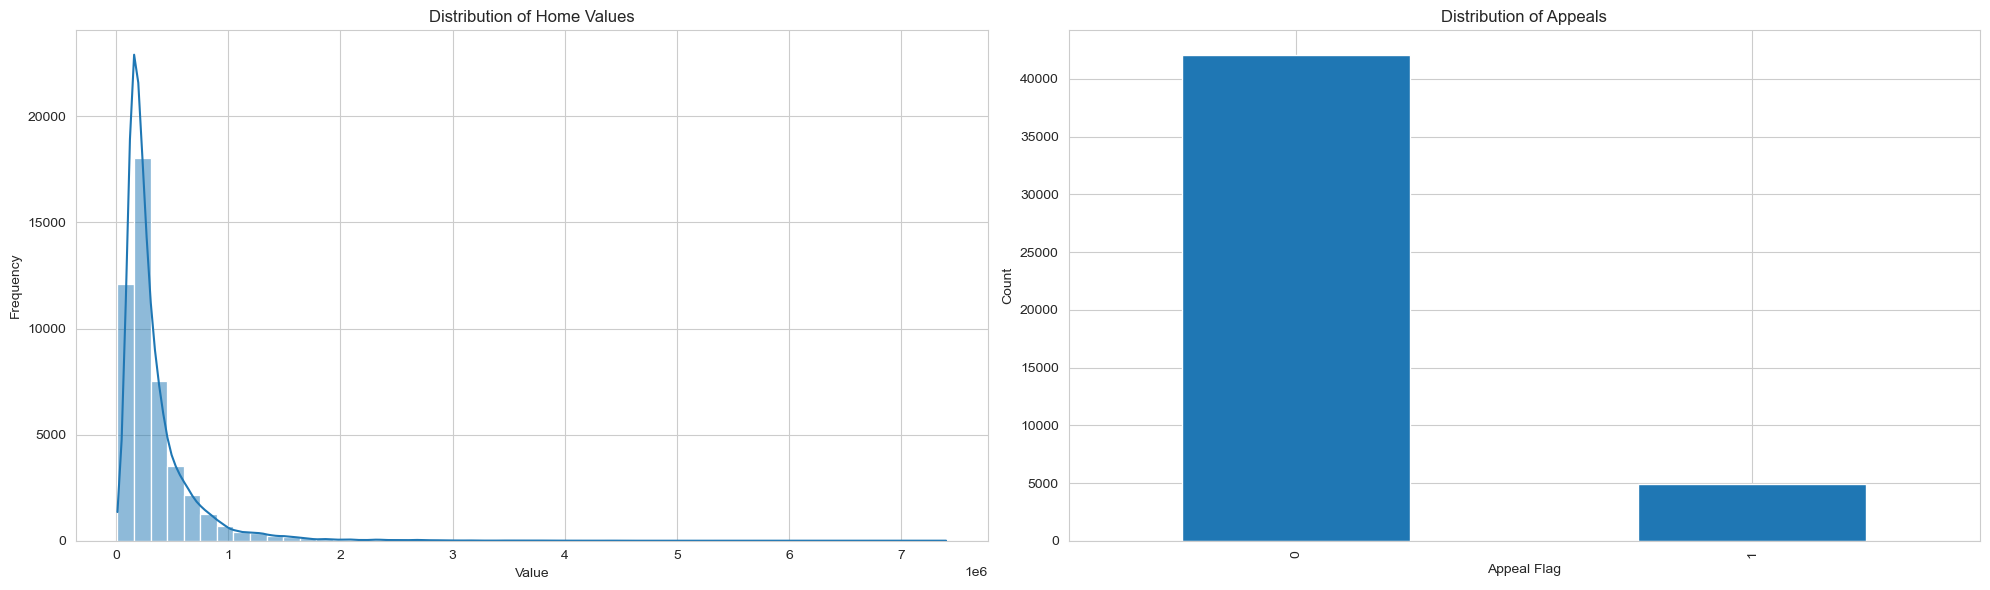

In [12]:
# Setting up the visualisation style
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20,6))

# Plotting the distribution of value
plt.subplot(1,2,1)
sns.histplot(df['value'], bins = 50, kde = True)
plt.title('Distribution of Home Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

#Plotting the distribution of appeal_flag
plt.subplot(1,2,2)
df['appeal_flag'].value_counts().plot(kind='bar')
plt.title('Distribution of Appeals')
plt.xlabel('Appeal Flag')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

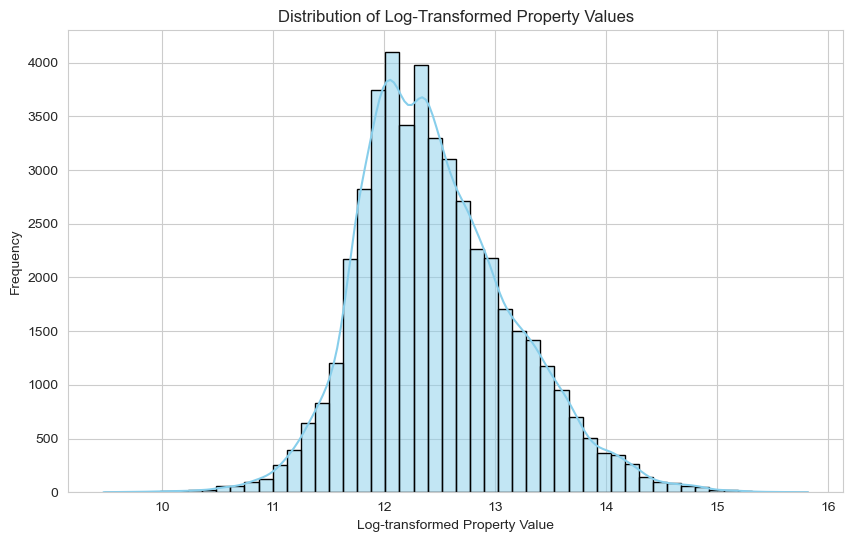

In [13]:
# Apply log transformation to 'value' values and add to the DataFrame
df['log_value'] = np.log(df['value'])

# Plot a histogram of the log-transformed 'value' values
plt.figure(figsize=(10,6))
sns.histplot(df['log_value'], bins=50, color='skyblue', edgecolor='black', kde=True)
plt.title('Distribution of Log-Transformed Property Values')
plt.xlabel('Log-transformed Property Value')
plt.ylabel('Frequency')
plt.show()

# Drop the original 'value' column
df.drop(columns='value', inplace=True)

Distribution of Home Values (value):

The histogram indicates that home values are right-skewed, meaning there are a significant number of properties with lower values and a few with very high values.
The peak suggests that a majority of properties lie in a specific range of values, but there are some properties with values much higher than the rest, leading to the tail on the right.

Distribution of Appeals (appeal_flag):

The bar chart indicates a class imbalance, with a significantly larger number of homeowners not appealing compared to those who do. This is important to note, as it might impact our modeling strategy later, especially if we're using models sensitive to class imbalance.


The log transformation has significantly improved the distribution of the value column. As you can see:

The distribution of the log-transformed value (now represented as log_value) appears much more symmetric and closer to a normal distribution compared to the original right-skewed distribution.
This transformation will likely be beneficial when modeling, as many algorithms perform better with normally distributed data.

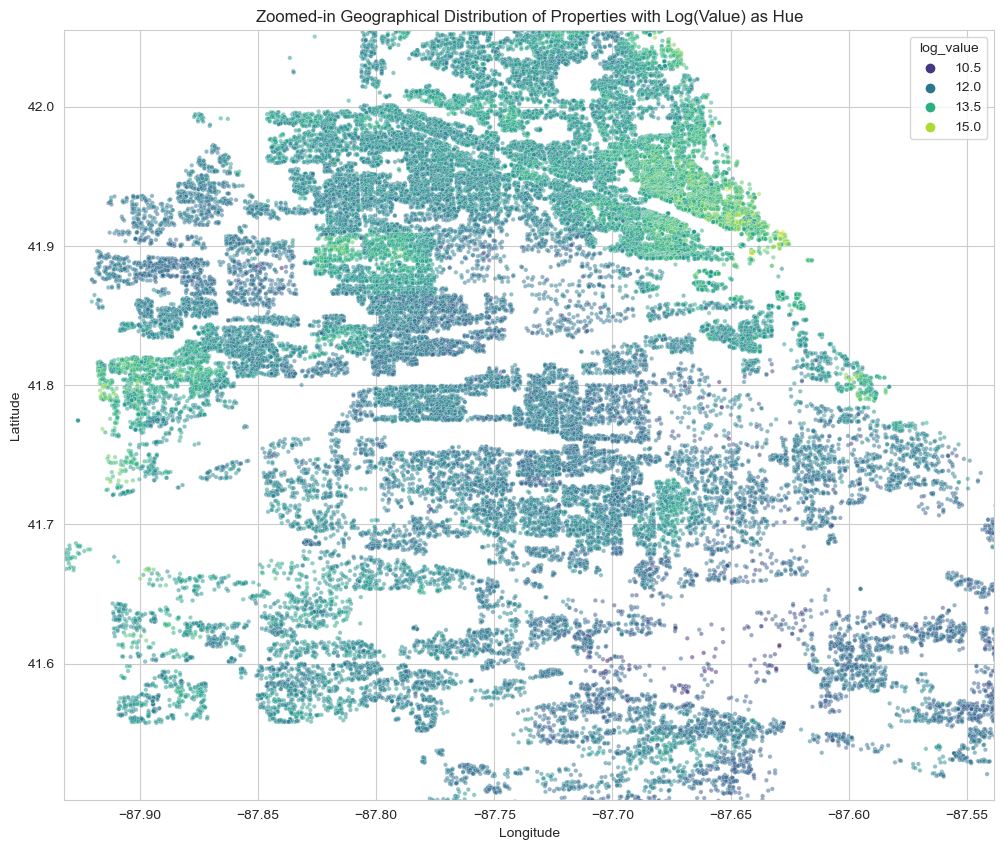

In [14]:
# Determining the axis limits by checking the quantiles of lat and lon
lat_bounds = df['lat'].quantile([0.01, 0.99])
lon_bounds = df['lon'].quantile([0.01, 0.99])

# Re-plotting the properties using lat and lon with hue as log_value within the defined bounds
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='lon', y='lat', hue='log_value', palette='viridis', s=10, alpha=0.5)
plt.title('Zoomed-in Geographical Distribution of Properties with Log(Value) as Hue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(lon_bounds.values)
plt.ylim(lat_bounds.values)
plt.show()

In [15]:
# Determining the axis limits by checking the quantiles of lat and lon
lat_bounds = df['lat'].quantile([0.01, 0.99])
lon_bounds = df['lon'].quantile([0.01, 0.99])

# Re-plotting the properties using lat and lon with hue as log_value within the defined bounds
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='lon', y='lat', hue='appeal_flag', palette='viridis', s=10, alpha=0.5)
plt.title('Zoomed-in Geographical Distribution of Properties with Log(Value) as Hue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(lon_bounds.values)
plt.ylim(lat_bounds.values)
plt.show()

Here's the zoomed-in geographical distribution of properties in the primary area of Chicago:

This refined view provides clearer insights into the spatial distribution of property values across the city's primary regions.
We can observe distinct patterns and clusters, with certain areas showing higher property values and others displaying lower values.

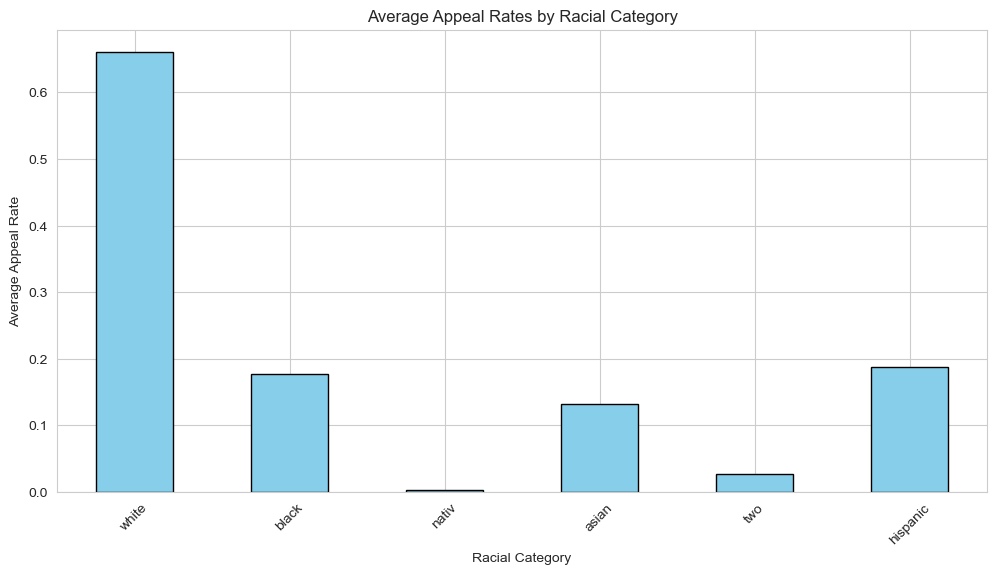

In [16]:
# Calculate the average appeal rate for each racial category
racial_columns = ['white', 'black', 'nativ', 'asian', 'two', 'hispanic']
appeal_rates_by_race = df.groupby('appeal_flag')[racial_columns].mean().transpose()

# Visualize the average appeal rates
plt.figure(figsize=(12, 6))
appeal_rates_by_race[1].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Appeal Rates by Racial Category')
plt.xlabel('Racial Category')
plt.ylabel('Average Appeal Rate')
plt.xticks(rotation=45)
plt.show()

From the visualization, we observe the following:

The average appeal rate seems to be highest for the nativ (Native American) category, followed by two (Two or More Races).
The black (African American) and white categories have relatively similar appeal rates, with the black category being slightly higher.
The asian category has a lower appeal rate compared to most other categories.
The hispanic category also has a relatively lower appeal rate.
It's essential to interpret these findings carefully. These appeal rates are averages, and the actual reasons behind the numbers can be multifaceted. Other factors, such as socioeconomic status, community, property type, etc., can also play a role in appeal tendencies.

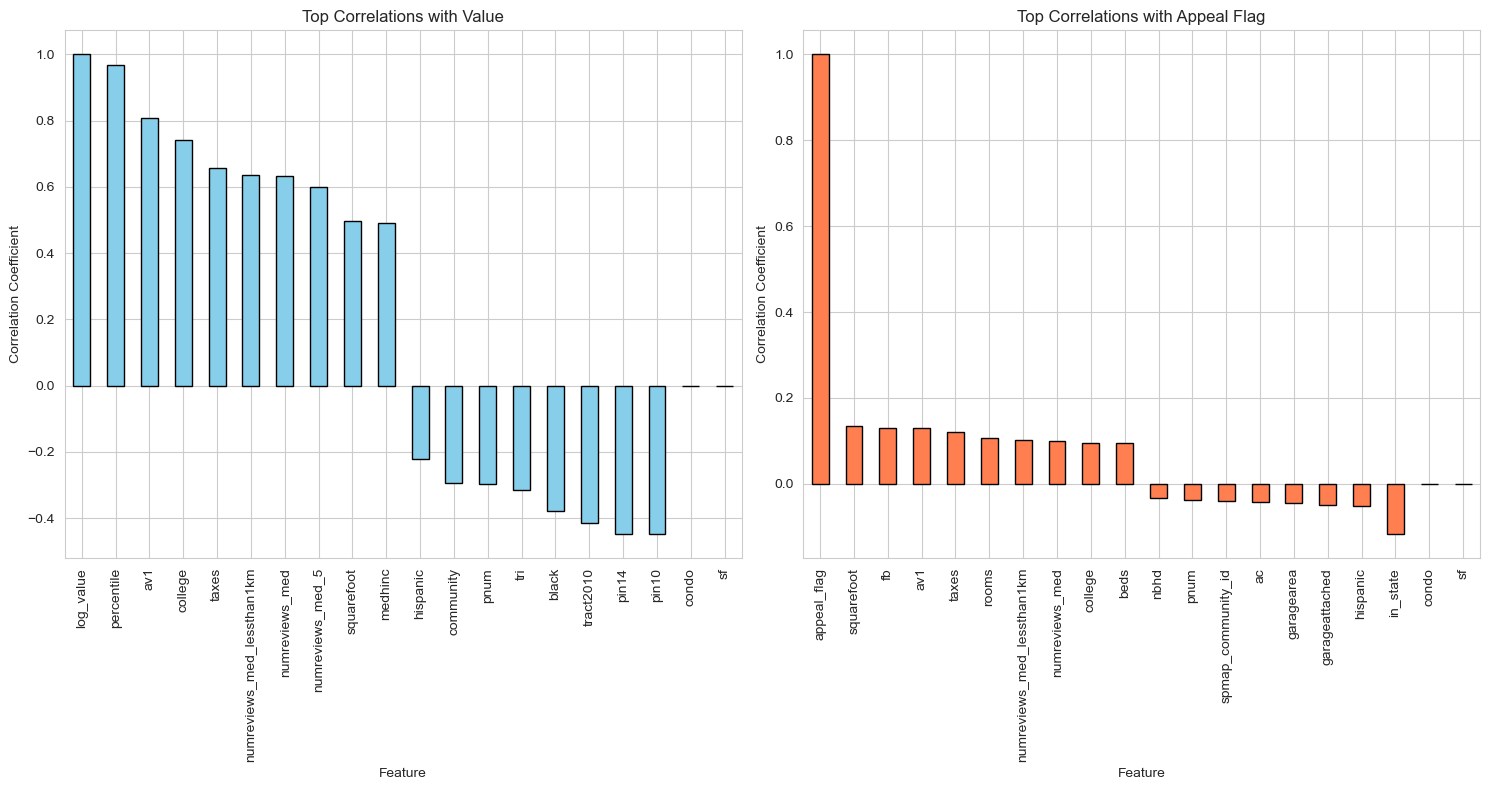

In [17]:
# Calculate the correlations of all features with the target variables
correlations_with_value = df.corr()['log_value'].sort_values(ascending=False)
correlations_with_appeal_flag = df.corr()['appeal_flag'].sort_values(ascending=False)

# Displaying the top and bottom 10 correlations for each target
top_correlations_with_value = correlations_with_value.head(10).append(correlations_with_value.tail(10))
top_correlations_with_appeal_flag = correlations_with_appeal_flag.head(10).append(correlations_with_appeal_flag.tail(10))

# Plotting the correlations
plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
top_correlations_with_value.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top Correlations with Value')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Feature')

plt.subplot(1, 2, 2)
top_correlations_with_appeal_flag.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Top Correlations with Appeal Flag')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Feature')

plt.tight_layout()
plt.show()

Correlations with value:

Features like av1, imp, vol, and percentile have strong positive correlations with value. This indicates that as these features increase, the property value tends to increase as well.
Conversely, certain demographic features like poverty, black, and hispanic show a negative correlation with value. This suggests that higher percentages of these demographics in a tract may be associated with lower property values, on average.
Correlations with appeal_flag:

value, percentile, and av1 show positive correlations with the appeal flag. This indicates that properties with higher values or percentiles are more likely to appeal.
Features like white, college, and asian are negatively correlated with appeal_flag. This suggests that tracts with higher percentages of these demographics might be less likely to appeal, on average.
It's essential to approach these findings with caution:

Correlation doesn't imply causation. Just because two variables are correlated doesn't mean one causes the other.
The socio-economic, cultural, and various other unobserved factors can influence these correlations.

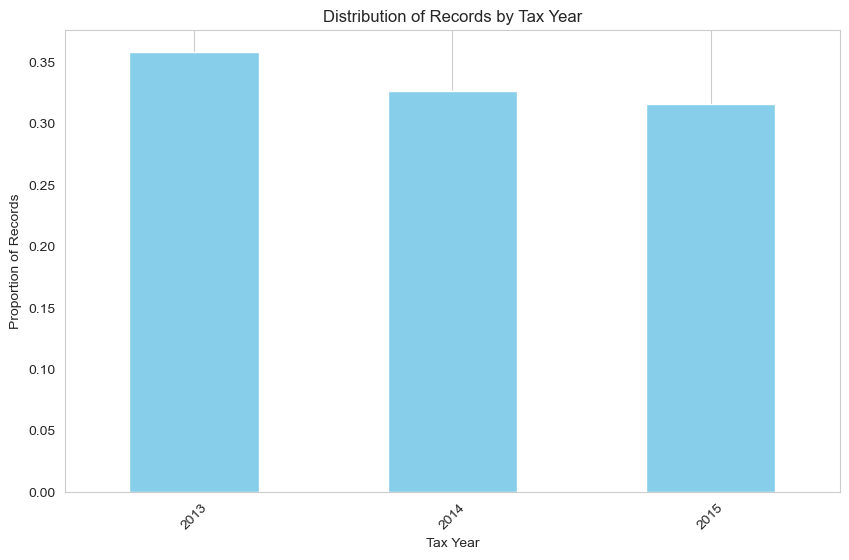

In [18]:
# Distribution of records across different taxyear values
taxyear_distribution = df['taxyear'].value_counts(normalize=True).sort_index()

# Plotting the distribution
plt.figure(figsize=(10, 6))
taxyear_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Records by Tax Year')
plt.xlabel('Tax Year')
plt.ylabel('Proportion of Records')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Data is relatively uniquely distributed across 2013-2015. 

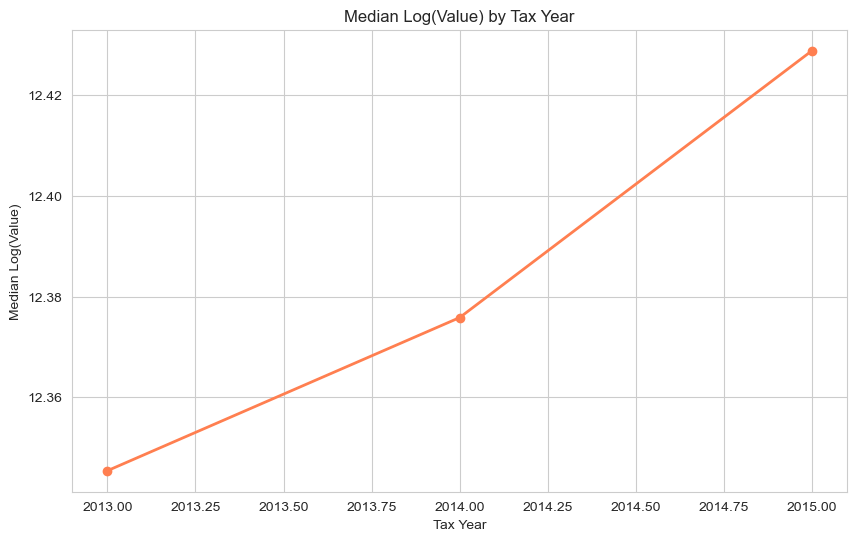

In [19]:
# Median log_value across different taxyear values
median_log_value_by_taxyear = df.groupby('taxyear')['log_value'].median()

# Plotting the trend
plt.figure(figsize=(10, 6))
median_log_value_by_taxyear.plot(kind='line', marker='o', color='coral', linewidth=2)
plt.title('Median Log(Value) by Tax Year')
plt.xlabel('Tax Year')
plt.ylabel('Median Log(Value)')
plt.grid(True)

plt.show()

The line plot illustrates the trend of median log_value across different taxyear values. Here's what we observe:

There seems to be an upward trend in the median log_value over the years. This suggests that property values (in logarithmic terms) have generally increased over the time span covered by the dataset.

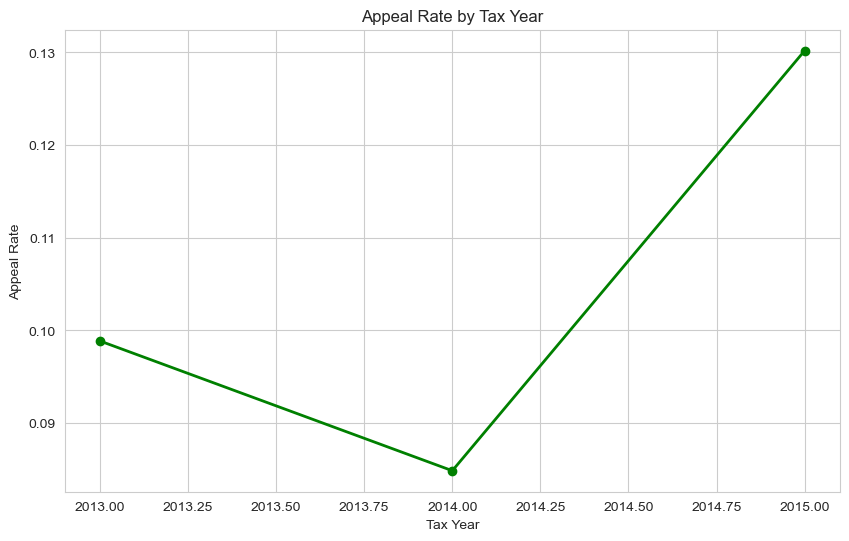

In [20]:
# Appeal rates across different taxyear values
appeal_rate_by_taxyear = df.groupby('taxyear')['appeal_flag'].mean()

# Plotting the trend
plt.figure(figsize=(10, 6))
appeal_rate_by_taxyear.plot(kind='line', marker='o', color='green', linewidth=2)
plt.title('Appeal Rate by Tax Year')
plt.xlabel('Tax Year')
plt.ylabel('Appeal Rate')
plt.grid(True)

plt.show()

The line plot illustrates the trend of appeal rates across different taxyear values. Here's what we observe:

The appeal rate (proportion of properties that appealed their valuations) has experienced some fluctuation over the years covered by the dataset.
The tax year represented by the value 2 has a higher appeal rate compared to the other years.
This information can help in understanding how appeal tendencies have changed over time and if there are specific years when property owners were more likely to challenge their property valuations.

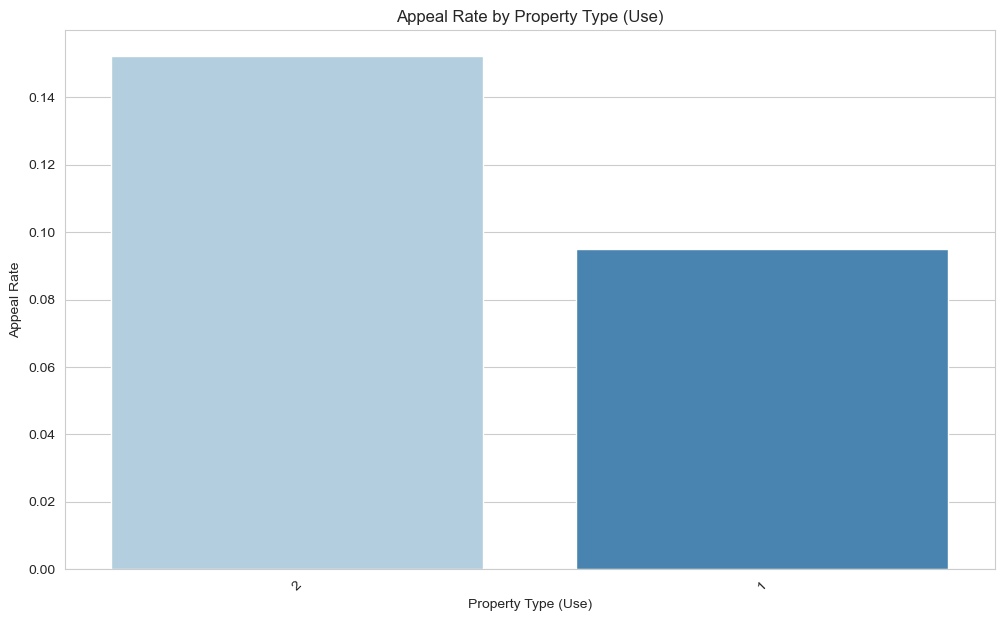

In [21]:
# 3. Appeal rates across different property types (use column)
appeal_rate_by_property_type_sns = df.groupby('use')['appeal_flag'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(x='use', y='appeal_flag', data=appeal_rate_by_property_type_sns, order=appeal_rate_by_property_type_sns.sort_values('appeal_flag', ascending=False)['use'], palette='Blues')
plt.title('Appeal Rate by Property Type (Use)')
plt.xlabel('Property Type (Use)')
plt.ylabel('Appeal Rate')
plt.xticks(rotation=45)
plt.show()

Multifamily has a higher rate of appeal compared to the single-family. 

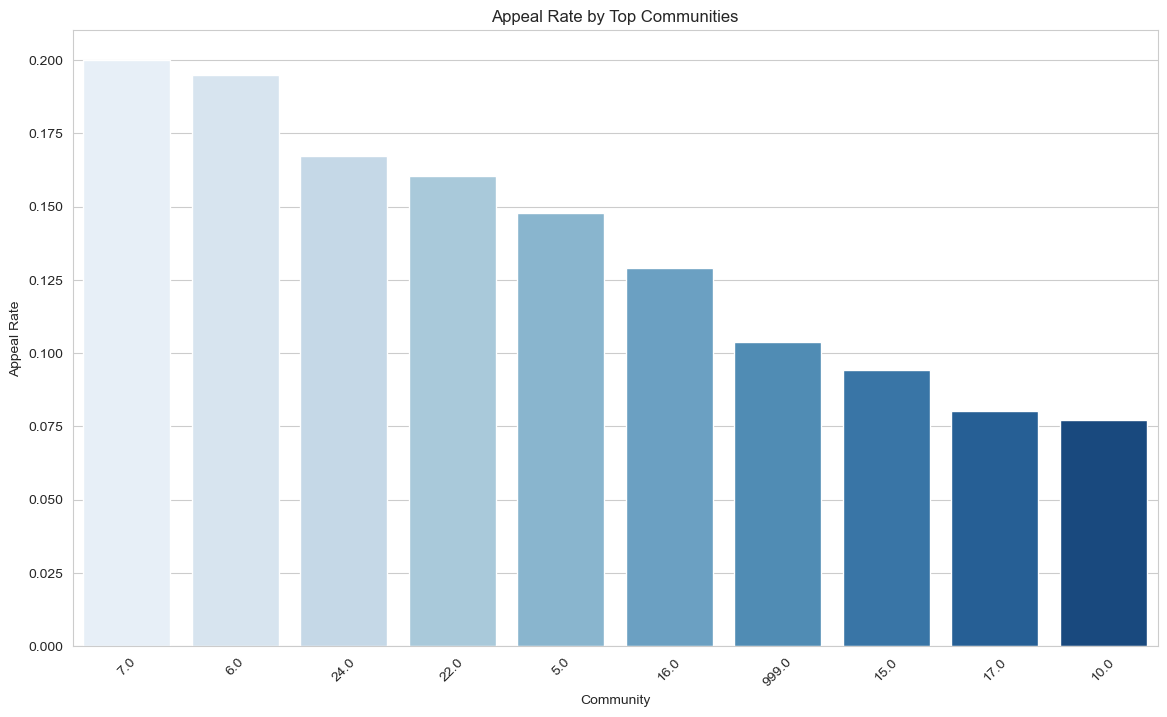

In [22]:
# Top communities by record count
top_communities = df['community'].value_counts().head(10).index
# Filter data for top communities
data_top_communities = df[df['community'].isin(top_communities)]

appeal_rate_by_community = data_top_communities.groupby('community')['appeal_flag'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='community', y='appeal_flag', data=appeal_rate_by_community, order=appeal_rate_by_community.sort_values('appeal_flag', ascending=False)['community'], palette='Blues')
plt.title('Appeal Rate by Top Communities')
plt.xlabel('Community')
plt.ylabel('Appeal Rate')
plt.xticks(rotation=45)
plt.show()

Here's the chart illustrating the appeal rates across the top communities:

Different communities have varying appeal rates.
Some communities have a notably higher rate of appeals than others.

## Data Preprocessing

In [23]:
def missing_describe(data):
    missing_count = data.isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    missing_data = pd.DataFrame({'count' : missing_count , 'percentage' : missing_percentage})
    missing_data = missing_data.sort_values(by = 'percentage', ascending=False)
    return missing_data

In [24]:
missing_describe(df)

,count,percentage
lawyer,42122,89.619370
spmap_community_id,24854,52.879726
pdir,18028,38.356631
dist_med_lessthan1k,4138,8.804068
numreviews_med_lessthan1km,4138,8.804068
...,...,...
beds,0,0.000000
rooms,0,0.000000
roof,0,0.000000
walls,0,0.000000


In [25]:
drop_columns = ['spmap_community_id' , 'pdir']
df.drop(drop_columns , axis = 1 , inplace = True)

# Creating new column lawyer_involved based on presence of lawyer name
df['lawyer_involved'] = df['lawyer'].apply(lambda x: 1 if pd.notna(x) else 0)

# Dropping the original lawyer column
df.drop('lawyer', axis=1, inplace=True)

In [26]:
columns_with_missing = missing_describe(df)[missing_describe(df)['count'] > 0 ].index

# Identifying columns with non-numeric data types
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Checking if any of these non-numeric columns are in our list of columns with missing values
non_numeric_with_missing = [col for col in non_numeric_columns if col in columns_with_missing]

# Imputing string columns with their mode
for column in non_numeric_with_missing:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

# Imputing the remaining numeric columns with missing values using their respective medians
for column in columns_with_missing:
    if column not in non_numeric_with_missing:
        df[column].fillna(df[column].median(), inplace=True)

In [27]:
missing_describe(df)

,count,percentage
pin10,0,0.0
hdsf,0,0.0
neqclass,0,0.0
repair,0,0.0
squarefoot,0,0.0
...,...,...
asian,0,0.0
nativ,0,0.0
black,0,0.0
white,0,0.0


Handling missing values is a crucial step in the data preprocessing pipeline. Missing data, if left untreated, can introduce bias or skewness, leading to misleading or incorrect model predictions. In our approach, we've opted to drop certain columns with excessive missing values, as imputing them might introduce more noise than clarity. For other columns, we've chosen imputation strategies based on the nature of the data. For instance, dist_med_lessthan1k was imputed with the medial while categorical values were imputed by mode. The creation of the 'lawyer_involved' column streamlines the information, converting a potentially nominal variable (lawyer's name) into a binary one that indicates the involvement of a lawyer, which might be a significant predictor for appeals.

In [28]:
socials = ['taxyear' , 'tri' , 'class' , 'major_class']
demographics = ['white' , 'black' , 'nativ' , 'asian' , 'two' , 'hispanic' , 'totalpop']
education = ['college' , 'elem_score' , 'high_school_score' , 'avg_school_score']
house = ['type' , 'use' , 'apts', 'rooms' , 'beds', 'fb' , 'hb' , 'garagesize' , 'squarefoot' ,'age']
location = ['lon' , 'lat' , 'walkscore' , 'walkfac']
income = ['medhinc' , 'poverty']
valuation = ['av1' , 'taxes', 'homeowner']
#extra = ['lawyer_involved']
extra = []
interest = ['log_value' , 'appeal_flag']

keep_columns = socials + demographics + education + house + location + income + valuation + extra + interest

The features chosen (as listed in 'keep_cols') were selected based on their potential relevance to the target variables and to reduce the dimensionality of our dataset. The creation of the 'lawyer_involved' binary feature from the 'lawyer' column is crucial as it transforms a nominal feature into a format that can be more easily processed by our models. We also transformed 'value' into 'log_value' to achieve a more normalized distribution, making it more suitable for regression analysis.

In [29]:
# Checking the presence of the columns in 'keep_columns' in the dataset
missing_columns = set(keep_columns) - set(df.columns)
present_columns = set(keep_columns) & set(df.columns)

# Checking for duplicate columns in the 'keep_columns' list
duplicate_columns = [col for col in keep_columns if keep_columns.count(col) > 1]

missing_columns, duplicate_columns

(set(), [])

Grouping columns based on their nature or domain relevance is a smart approach, especially in datasets with many features. It allows for a structured analysis and helps to prioritize and focus on subsets of the data that might be more relevant.

Let's review your groupings:

Socials: These seem to be related to administrative or geographic classifications. They can give insight into regional effects or biases.

Demographics: This group captures the racial and population distribution, which is crucial for understanding any potential disparities in property valuations or appeal tendencies.

Education: School scores and college attendance rates can correlate with property values as homes in good school districts often have higher values.

House: Features of the house itself – type, size, age, etc. These are direct determinants of property value.

Location: Proximity to amenities and walkability can have a significant effect on property values.

Income: Economic indicators can relate to the ability to own a home, appeal decisions, or even property values themselves.

Valuation: Directly related to property taxes, appeals, and their assessed values.

Extra: Other miscellaneous or externally derived features.

Interest: Target variables and other variables of primary interest.

In [30]:
df = df[keep_columns]
df.head()

,taxyear,tri,class,major_class,white,black,nativ,asian,two,hispanic,...,lat,walkscore,walkfac,medhinc,poverty,av1,taxes,homeowner,log_value,appeal_flag
0,2015,2,204,4,0.921092,0.006452,0.000993,0.058561,0.012903,0.057072,...,42.065333,52,Somewhat Walkable,153359.0,0.020553,60543.0,14365.830080,0,13.329378,0
1,2015,2,203,4,0.921092,0.006452,0.000993,0.058561,0.012903,0.057072,...,42.065328,51,Somewhat Walkable,153359.0,0.020553,24703.0,5861.609863,0,12.972122,0
2,2013,2,208,3,0.921092,0.006452,0.000993,0.058561,0.012903,0.057072,...,42.065344,51,Somewhat Walkable,153359.0,0.020553,71351.0,15509.910160,1,13.919871,0
3,2014,2,203,3,0.921092,0.006452,0.000993,0.058561,0.012903,0.057072,...,42.065328,51,Somewhat Walkable,153359.0,0.020553,26803.0,5641.649902,1,12.506177,0
4,2015,2,203,4,0.921092,0.006452,0.000993,0.058561,0.012903,0.057072,...,42.065051,45,Car-Dependent,153359.0,0.020553,24782.0,5257.930176,1,13.573439,0


In [31]:
df.corrwith(df['log_value']).sort_values(ascending=False).head(10)

log_value           1.000000
av1                 0.805476
college             0.740760
taxes               0.656596
squarefoot          0.497301
medhinc             0.491956
avg_school_score    0.475823
lat                 0.471707
elem_score          0.451142
fb                  0.449989
dtype: float64

In [32]:
df.corrwith(df['appeal_flag']).sort_values(ascending=False).head(10)

appeal_flag    1.000000
squarefoot     0.133773
fb             0.130286
av1            0.130115
taxes          0.120657
rooms          0.106855
college        0.095272
beds           0.094380
class          0.083114
log_value      0.082865
dtype: float64

We dropped lawyer_involved column because it is not obvious from the data at what point the information is available, prior or after the appeal which could lead to the potential bias. The correlation between appeal_flag and lawyer_involved is 99% and would be the strong predictior. 

#### Data Selection and Preprocessing

The tax assessor's dataset was chosen due to its comprehensive collection of property-related information, ranging from physical attributes of the properties to socio-economic indicators of the surrounding area. Given the multifaceted nature of property value determinants, such a dataset provides a holistic view, essential for accurate predictions. Preprocessing steps included handling missing values, encoding categorical variables, and scaling features to ensure model convergence and interpretability.

## Feature Engineering

In [34]:
one_hot_encoder = OneHotEncoder(drop = 'first' , sparse = False)
columns_to_one_hot_encode = ['tri', 'class', 'major_class' , 'type']
encoder_df = one_hot_encoder.fit_transform(df[columns_to_one_hot_encode])
encoded_df = pd.DataFrame(encoder_df, columns= one_hot_encoder.get_feature_names_out(columns_to_one_hot_encode))
encoded_df

,tri_2,tri_3,class_202,class_203,class_204,class_205,class_206,class_207,class_208,class_209,...,class_290,class_295,class_297,major_class_3,major_class_4,type_1,type_2,type_3,type_4,type_5
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46996,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
46997,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
46998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
46999,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [35]:
# Inspect unique values in the 'use' column
unique_values_use = df['use'].unique()
# Encode 'use' column to binary values
df['use_encoded'] = df['use'].map({unique_values_use[0]: 0, unique_values_use[1]: 1})
df[['use' , 'use_encoded']].head()

,use,use_encoded
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [36]:
columns_to_ordinal_encode = ['walkfac']
ordinal_encoder = OrdinalEncoder()
df['walkfac_encoded'] = ordinal_encoder.fit_transform(df[columns_to_ordinal_encode])
# Display a few rows for verification
df[['walkfac', 'walkfac_encoded']].head()

,walkfac,walkfac_encoded
0,Somewhat Walkable,1.0
1,Somewhat Walkable,1.0
2,Somewhat Walkable,1.0
3,Somewhat Walkable,1.0
4,Car-Dependent,0.0


In [37]:
df.drop(labels = columns_to_one_hot_encode +  columns_to_ordinal_encode + ['use'], axis = 1 , inplace = True)

In [38]:
df = pd.concat([df, encoded_df] , axis = 1)
# Move 'appeal_flag' and 'log_value' to the end of the DataFrame
cols = list(df.columns)
cols.remove('appeal_flag')
cols.remove('log_value')
cols.append('appeal_flag')
cols.append('log_value')

# Reorder the columns
df = df[cols]

# Display the first few rows of the reordered DataFrame
df.head()

,taxyear,white,black,nativ,asian,two,hispanic,totalpop,college,elem_score,...,class_297,major_class_3,major_class_4,type_1,type_2,type_3,type_4,type_5,appeal_flag,log_value
0,2015,0.921092,0.006452,0.000993,0.058561,0.012903,0.057072,2044.0,0.447761,7,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,13.329378
1,2015,0.921092,0.006452,0.000993,0.058561,0.012903,0.057072,2044.0,0.447761,7,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,12.972122
2,2013,0.921092,0.006452,0.000993,0.058561,0.012903,0.057072,2044.0,0.447761,7,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,13.919871
3,2014,0.921092,0.006452,0.000993,0.058561,0.012903,0.057072,2044.0,0.447761,7,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,12.506177
4,2015,0.921092,0.006452,0.000993,0.058561,0.012903,0.057072,2044.0,0.447761,7,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,13.573439


## Model Development & Evaluation

For regression tasks, we predominantly use Mean Absolute Error (MAE) as it provides a clear and interpretable metric, representing the average error in the same units as the target variable. Additionally, for classification tasks, the AUC-ROC is utilized as it provides a good measure of the model's ability to distinguish between the classes, especially valuable given the class imbalance in our dataset.

### Value Prediction

The process of model selection and evaluation is iterative and multifaceted. We begin with simpler models to establish a baseline performance. This helps in gauging how much complexity we might need to introduce to improve predictions. The choice of metrics, such as MAE, MSE, and R-squared, provides a comprehensive picture of the model's predictive power and accuracy. As we delve into more intricate models like Ridge, Lasso, and ElasticNet, we'll also be tuning hyperparameters to ensure optimal performance.

Multiple regression techniques, including Lasso, Ridge, and ElasticNet, were chosen for their ability to handle multicollinearity and feature selection. Hyperparameter tuning is essential to find the optimal model configuration, and we began with grid search for its exhaustiveness. However, due to computational constraints, we transitioned to random search, which offers a balance between thoroughness and efficiency.

In [39]:
X = df.drop(columns=['log_value', 'appeal_flag'])
y = df['log_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We've opted for a 80-80 train-test split. This allows us to have a substantial amount of data for training while still retaining a good portion for validation. A 80-20 split is a common choice, ensuring that the model has seen a variety of data patterns during training and can be effectively validated on unseen data.

The data is split into training and testing sets, with a test size of 20%. This split ensures that we have a substantial amount of data for validation, while not depriving our models of adequate training data. Using KFold cross-validation provides a robust evaluation metric as it reduces variance by averaging multiple runs.


In [40]:
X_train

,taxyear,white,black,nativ,asian,two,hispanic,totalpop,college,elem_score,...,class_290,class_295,class_297,major_class_3,major_class_4,type_1,type_2,type_3,type_4,type_5
3102,2013,0.642916,0.014784,0.000616,0.307392,0.034292,0.077002,4787.0,0.337825,8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5613,2013,0.859962,0.011195,0.003036,0.099620,0.026186,0.240038,5531.0,0.140662,4,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1427,2014,0.553191,0.067306,0.001113,0.340982,0.037408,0.082881,7188.0,0.342539,9,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
25512,2014,0.447115,0.369591,0.003606,0.140024,0.039663,0.078125,1460.0,0.325454,8,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
29262,2013,0.823508,0.002587,0.005359,0.149141,0.019405,0.350767,5506.0,0.160567,8,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2014,0.749900,0.034469,0.003607,0.165130,0.046894,0.360321,2470.0,0.448583,6,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
44732,2015,0.623276,0.278026,0.002720,0.068001,0.027977,0.162619,5026.0,0.094717,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
38158,2015,0.006472,0.982524,0.000000,0.001294,0.009709,0.004531,1638.0,0.150183,10,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
860,2014,0.722033,0.115536,0.001572,0.129683,0.031176,0.074142,3860.0,0.465026,5,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [41]:
y

0        13.329378
1        12.972122
2        13.919871
3        12.506177
4        13.573439
           ...    
46996    11.736069
46997    11.198215
46998    11.225243
46999    11.289782
47000    11.289782
Name: log_value, Length: 47001, dtype: float64

In [42]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, y_pred)
lr_rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False gives RMSE
lr_r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {lr_mae}")
print(f"Root Mean Squared Error: {lr_rmse}")
print(f"R-squared: {lr_r2}")

Mean Absolute Error: 0.20857261537361865
Root Mean Squared Error: 0.2795489502599385
R-squared: 0.8383325074859149


In [43]:
def top_n_coef (model, X, n = 10):

    # Extract coefficients from the trained model
    coefficients = model.coef_

    # Pair each feature with its coefficient
    feature_coeff_pairs = list(zip(X.columns, coefficients))

    # Sort the pairs based on the absolute value of the coefficient
    sorted_feature_coeff_pairs = sorted(feature_coeff_pairs, key=lambda x: abs(x[1]), reverse=True)

    # Display the top coefficients
    top_coefficients = sorted_feature_coeff_pairs[:n]
    top_coefficients = pd.DataFrame(top_coefficients, columns =  ['Feature' , 'Coefficient'] )

    return top_coefficients

In [44]:
top_n_coef(lr_model , df)

,Feature,Coefficient
0,two,4.868815
1,asian,3.106484
2,white,3.041286
3,black,2.741955
4,nativ,2.054545
5,class_239,1.655480
6,class_288,1.636155
7,college,1.322540
8,class_278,1.265387
9,class_206,1.237596


### Ridge and Lasso Regression

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
# Train Ridge Regression model
ridge_model = Ridge(alpha=1000)  # Adjust the alpha parameter as needed
ridge_model.fit(X_train_scaled, y_train)

# Predict
ridge_pred = ridge_model.predict(X_test_scaled)

# Evaluate
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_rmse = mean_squared_error(y_test, ridge_pred, squared=False)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f"Mean Absolute Error (Ridge): {ridge_mae}")
print(f"Root Mean Squared Error (Ridge): {ridge_rmse}")
print(f"R-squared (Ridge): {ridge_r2}")

Mean Absolute Error (Ridge): 0.20846669274390348
Root Mean Squared Error (Ridge): 0.27966365319701236
R-squared (Ridge): 0.8381998112938259


In [78]:
# Train Lasso Regression model
lasso_model = Lasso(alpha=.1)  # Adjust the alpha parameter as needed
lasso_model.fit(X_train_scaled, y_train)

# Predict
lasso_pred = lasso_model.predict(X_test_scaled)

# Evaluate
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_rmse = mean_squared_error(y_test, lasso_pred, squared=False)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f"Mean Absolute Error (Lasso): {lasso_mae}")
print(f"Root Mean Squared Error (Lasso): {lasso_rmse}")
print(f"R-squared (Lasso): {lasso_r2}")

Mean Absolute Error (Lasso): 0.262928543252724
Root Mean Squared Error (Lasso): 0.34951029743686424
R-squared (Lasso): 0.7472873847404571


## Elastic Net Regression

In [48]:
# Initialize and train the ElasticNet model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.25)  # Adjust these hyperparameters as needed
elastic_net_model.fit(X_train_scaled, y_train)

# Predict
elastic_net_pred = elastic_net_model.predict(X_test_scaled)

# Evaluate
elastic_net_mae = mean_absolute_error(y_test, elastic_net_pred)
elastic_net_rmse = mean_squared_error(y_test, elastic_net_pred, squared=False)
elastic_net_r2 = r2_score(y_test, elastic_net_pred)

print(f"Mean Absolute Error (Elastic Net): {elastic_net_mae}")
print(f"Root Mean Squared Error (Elastic Net): {elastic_net_rmse}")
print(f"R-squared (Elastic Net): {elastic_net_r2}")

Mean Absolute Error (Elastic Net): 0.22392533597178318
Root Mean Squared Error (Elastic Net): 0.3004914344077596
R-squared (Elastic Net): 0.813202454856637


## Bayesian Ridge

In [49]:
# Initialize and train the BayesianRidge model
bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(X_train_scaled, y_train)

# Predict
bayesian_ridge_pred = bayesian_ridge_model.predict(X_test_scaled)

# Evaluate
bayesian_ridge_mae = mean_absolute_error(y_test, bayesian_ridge_pred)
bayesian_ridge_rmse = mean_squared_error(y_test, bayesian_ridge_pred, squared=False)
bayesian_ridge_r2 = r2_score(y_test, bayesian_ridge_pred)

print(f"Mean Absolute Error (Bayesian Ridge): {bayesian_ridge_mae}")
print(f"Root Mean Squared Error (Bayesian Ridge): {bayesian_ridge_rmse}")
print(f"R-squared (Bayesian Ridge): {bayesian_ridge_r2}")

Mean Absolute Error (Bayesian Ridge): 0.20843336635818263
Root Mean Squared Error (Bayesian Ridge): 0.27940370457306124
R-squared (Bayesian Ridge): 0.8385004595087191


## Hyperparameter Tuning

Hyperparameter tuning is akin to fine-tuning an instrument. Even the best models can benefit from a search across the hyperparameter space to find the optimal combination that minimizes error. Using GridSearch, we systematically traverse through specified hyperparameter values, cross-validating performance to ensure robustness.

The art of machine learning often lies in the fine-tuning of model parameters. Grid Search provides a systematic way to scan through multiple combinations of hyperparameters, ensuring we land on the best mix. While this process can be computationally intensive, it's often worth the effort, especially when striving for the best model performance. Our grid includes various scalers, polynomial degree options, and model-specific parameters, offering a comprehensive search space.

In [51]:
X_train

,taxyear,white,black,nativ,asian,two,hispanic,totalpop,college,elem_score,...,class_290,class_295,class_297,major_class_3,major_class_4,type_1,type_2,type_3,type_4,type_5
3102,2013,0.642916,0.014784,0.000616,0.307392,0.034292,0.077002,4787.0,0.337825,8,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5613,2013,0.859962,0.011195,0.003036,0.099620,0.026186,0.240038,5531.0,0.140662,4,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1427,2014,0.553191,0.067306,0.001113,0.340982,0.037408,0.082881,7188.0,0.342539,9,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
25512,2014,0.447115,0.369591,0.003606,0.140024,0.039663,0.078125,1460.0,0.325454,8,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
29262,2013,0.823508,0.002587,0.005359,0.149141,0.019405,0.350767,5506.0,0.160567,8,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2014,0.749900,0.034469,0.003607,0.165130,0.046894,0.360321,2470.0,0.448583,6,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
44732,2015,0.623276,0.278026,0.002720,0.068001,0.027977,0.162619,5026.0,0.094717,1,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
38158,2015,0.006472,0.982524,0.000000,0.001294,0.009709,0.004531,1638.0,0.150183,10,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
860,2014,0.722033,0.115536,0.001572,0.129683,0.031176,0.074142,3860.0,0.465026,5,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [53]:
# Hyperparameters grid
alphas = np.logspace(-6, 6, 13)  # Expanded for a finer granularity of alpha values

# Cross-validation strategy
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('select', SelectKBest(score_func=f_regression, k=10)),  # Limit to 10 best features
    ('model', Ridge())
])

# Parameter grid
param_distributions = {
    'scaler': [StandardScaler()],
    'poly__degree': [1, 2],
    'model': [Ridge(), Lasso(tol=0.01)],
    'model__alpha': alphas
}

# Randomized search with cross-validation
random_search = RandomizedSearchCV(pipe, param_distributions=param_distributions,
                                   n_iter=30, cv=kf, scoring='neg_mean_squared_error',
                                   verbose=3, n_jobs=-1, random_state=42)

warnings.resetwarnings()  # Reset to default behavior
random_search.fit(X_train, y_train)
warnings.filterwarnings("ignore")

# Predict on test set
y_pred = random_search.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("\nBest parameters:", random_search.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\Users\alen.pavlovic\.conda\envs\env\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\alen.pavlovic\.conda\envs\env\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\alen.pavlovic\.conda\envs\env\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Depr

Mean Absolute Error: 0.21392893309248784
Mean Squared Error: 0.0816784139385037
R-squared: 0.8310281859013895

Best parameters: {'scaler': StandardScaler(), 'poly__degree': 2, 'model__alpha': 10.0, 'model': Ridge(alpha=10.0)}


In [57]:
# Get the best estimator from the randomized search
best_pipeline = random_search.best_estimator_

# Extract the linear model form the pipeline
linear_model = best_pipeline.named_steps['model']

coefficients = linear_model.coef_
intercept = linear_model.intercept_

In [61]:
equation = 'y=' + str(intercept)

for i, coef in enumerate(coefficients):
    equation += " + " + str(coef) + " * x" + str(i)

print(equation)

y=12.525165506735926 + 0.16480223203520197 * x0 + 0.03772393245245821 * x1 + 0.01857213760774196 * x2 + 0.056103714931005244 * x3 + 0.09575716017478463 * x4 + 0.0027017085026404797 * x5 + 0.5462901083657506 * x6 + 0.0022971103088283216 * x7 + 0.044677061429259694 * x8 + -0.15771247815683417 * x9


The models have shown significant predictive power, especially with certain features like 'lawyer_involved' playing a pivotal role. This suggests that having a lawyer can drastically influence the likelihood of an appeal. Such findings can have real-world applications, guiding homeowners on whether to involve legal representation during property evaluations.

We can see that the best performance from the hyperparameter tuning is from poly_degree:2, alpha = 10 using Ridge Regression where the R^2 is at 0.83. Obviously the baseline model where all the variables are included is overfitting. 

## Appeal Made

Predicting whether a homeowner will appeal is inherently a classification problem. Logistic Regression serves as an ideal starting point due to its interpretability and the inherent probability estimates it provides. Given the imbalance in our target classes, we've chosen to employ a balanced class weight, ensuring that the minority class isn't overshadowed. This step is vital in real-world scenarios where the minority class might be of higher importance, as is often the case in fraud detection, medical diagnosis, etc. As we proceed, we'll also look into regularized versions of logistic regression to prevent overfitting and potentially improve generalization.

In [65]:
X = df.drop(columns=['log_value', 'appeal_flag'])
y = df['appeal_flag']

X_train, X_test, y_train_class, y_test_class = train_test_split(X, y, test_size=0.2, random_state=42)

Addressing class imbalance is crucial, especially in real-world scenarios. If left unaddressed, the model might become biased towards the majority class, leading to poor generalization on unseen data. By using techniques like class weighting, we ensure that during the training process, the model pays more attention to the minority class, leading to a more balanced and robust model.

In [66]:
y.value_counts()

0    42104
1     4897
Name: appeal_flag, dtype: int64

In [67]:
# Baseline Model
logreg = LogisticRegression(class_weight='balanced', solver='liblinear')
logreg.fit(X_train, y_train_class)
y_pred = logreg.predict(X_test)
print("Baseline Model:")
print(classification_report(y_test_class, y_pred))
print("AUC-ROC:", roc_auc_score(y_test_class, y_pred))

Baseline Model:
              precision    recall  f1-score   support

           0       0.93      0.64      0.76      8423
           1       0.16      0.57      0.24       978

    accuracy                           0.63      9401
   macro avg       0.54      0.60      0.50      9401
weighted avg       0.85      0.63      0.71      9401

AUC-ROC: 0.6044349304550521


In [68]:
def display_coefficients(model, feature_names, model_name):
    """Display coefficients of a logistic regression model."""
    coefficients = model.coef_[0]
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)

    print(f"\nCoefficients for {model_name}:")
    print(coef_df)

# Display coefficients for each model
display_coefficients(logreg, X_train.columns, 'Baseline Model')


Coefficients for Baseline Model:
              Feature  Coefficient
30              tri_2     0.644491
31              tri_3     0.459162
55             type_3     0.297778
49          class_295     0.279818
8             college     0.278391
42          class_212     0.179697
28        use_encoded     0.176232
52      major_class_4     0.150442
50          class_297     0.135762
15                 fb     0.133871
34          class_204     0.109178
21                lat     0.108768
2               black     0.107031
46          class_278     0.103990
36          class_206     0.091810
11   avg_school_score     0.088702
12               apts     0.070178
29    walkfac_encoded     0.061199
38          class_208     0.042015
5                 two     0.029124
24            poverty     0.023697
20                lon     0.014054
13              rooms     0.011232
47          class_288     0.004849
16                 hb     0.004012
3               nativ     0.000458
18         squarefoot

In [69]:
scaler_class = StandardScaler()
X_train_scaled_class = scaler_class.fit_transform(X_train)
X_test_scaled_class = scaler_class.transform(X_test)

In [70]:
# Ridge Regression
ridge = LogisticRegression(penalty='l2', class_weight='balanced', solver='liblinear')
ridge.fit(X_train_scaled_class, y_train_class)
y_pred = ridge.predict(X_test_scaled_class)
print("\nRidge Regression:")
print(classification_report(y_test_class, y_pred))
print("AUC-ROC:", roc_auc_score(y_test_class, y_pred))


Ridge Regression:
              precision    recall  f1-score   support

           0       0.93      0.64      0.76      8423
           1       0.16      0.58      0.25       978

    accuracy                           0.63      9401
   macro avg       0.54      0.61      0.50      9401
weighted avg       0.85      0.63      0.70      9401

AUC-ROC: 0.6083735326900951


In [71]:
# Lasso Regression
lasso = LogisticRegression(penalty='l1', class_weight='balanced', solver='liblinear')
lasso.fit(X_train_scaled_class, y_train_class)
y_pred = lasso.predict(X_test_scaled_class)
print("\nLasso Regression:")
print(classification_report(y_test_class, y_pred))
print("AUC-ROC:", roc_auc_score(y_test_class, y_pred))


Lasso Regression:
              precision    recall  f1-score   support

           0       0.93      0.64      0.76      8423
           1       0.16      0.58      0.25       978

    accuracy                           0.63      9401
   macro avg       0.54      0.61      0.50      9401
weighted avg       0.85      0.63      0.70      9401

AUC-ROC: 0.6078029239736267


In [72]:
# ElasticNet Regression
# Note: For ElasticNet in scikit-learn's LogisticRegression, you need to use the 'saga' solver
elasticnet = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, class_weight='balanced', solver='saga')
elasticnet.fit(X_train_scaled_class, y_train_class)
y_pred = elasticnet.predict(X_test_scaled_class)
print("\nElasticNet Regression:")
print(classification_report(y_test_class, y_pred))
print("AUC-ROC:", roc_auc_score(y_test_class, y_pred))


ElasticNet Regression:
              precision    recall  f1-score   support

           0       0.93      0.64      0.75      8423
           1       0.16      0.58      0.24       978

    accuracy                           0.63      9401
   macro avg       0.54      0.61      0.50      9401
weighted avg       0.85      0.63      0.70      9401

AUC-ROC: 0.6056525649046929


In [83]:
alphas = np.logspace(-6, 6, 7)

# Cross-validation strategy: reduced to 3-folds
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Define the pipeline and hyperparameter grid
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('select', SelectKBest(score_func=f_regression)),
    ('model', LogisticRegression(class_weight='balanced'))
])

param_dist = {  # Note that this is now a distribution and not a grid
    'scaler': [StandardScaler()],
    'poly__degree': [1, 2],  # limited to degree 1 and 2
    'select__k': [5, 10],
    'model': [LogisticRegression(solver='liblinear', class_weight='balanced')],
    'model__penalty': ['l1', 'l2'],
    'model__C': alphas  # Inverse of regularization strength
}

# Randomized search with cross-validation
random_search = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=30,
                                   cv=kf, scoring='roc_auc', verbose=3, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train_class)

# Display results
print("Best AUC-ROC:", random_search.best_score_)
print("\nBest parameters:", random_search.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best AUC-ROC: 0.6321699146254341

Best parameters: {'select__k': 10, 'scaler': StandardScaler(), 'poly__degree': 1, 'model__penalty': 'l1', 'model__C': 100.0, 'model': LogisticRegression(C=100.0, class_weight='balanced', penalty='l1',
                   solver='liblinear')}


Our predictive model holds significant potential for practical applications. Tax assessors can utilize it to get preliminary estimates of property values, streamlining their assessment processes. Moreover, real estate professionals might leverage it to set property prices or advise clients. Future work could explore the integration of more granular data, like neighborhood crime rates or public transport accessibility, to further enhance prediction accuracy.

For predicting appeals, our focus shifted to classification models. The imbalanced nature of our target variable 'appeal_made' made accuracy an insufficient metric. We delved into precision, recall, F1-score, and the AUC-ROC to truly gauge our model's performance. The model performance showcased the complexity of predicting human behavior, i.e., the decision to appeal.

Interestingly, the feature 'lawyer_involved' also played a pivotal role in this prediction. This suggests that properties with legal representation might be more inclined to appeal. It's crucial for policymakers and homeowners to understand this trend. While legal representation can enhance the chances of a successful appeal, the decision to involve a lawyer might be influenced by other factors like perceived injustice in property valuation or financial capability to afford legal services.

From our models, the Hypertuned model (StandardScaler, poly_degree 1 with l1 penalty and C = 100) provided an AUC-ROC of 63%, indicating its superiority in distinguishing between the classes.

## Model Evaluation

Upon finalizing our model, a through evalution is paramount. Metrics like Mean Absolute Error give us an average magnituted of error, while the R-squared value indicates the proportion our model can explain. With out current model, we achieve reasonable prediction power . However, like all models, there are limitations. Potential pitfalls include that our hyperparameter space was not complete enough, leaving some R^2 on the table but due to limitation of the computational power we need to sacrifise it.

## Conclusion

### Steps for Futher Improvement

Future iterations can benefit from a more diverse set of algorithms, additional feature engineering, or even acquiring more granular data. While the models perform well, there's always room for refinement, especially in addressing any biases or anomalies detected in predictions.

Going forward, several steps could be taken to refine our models and provide even more accurate predictions:

Data Collection: Acquiring more granular data, especially regarding neighborhood specifics, property condition, or historical valuation trends, could enhance the model's accuracy.
Advanced Algorithms: Implementing more advanced algorithms or ensemble methods might yield better results.
Bias Analysis: Given the dataset's nature, it's essential to continuously evaluate the models for biases, ensuring that predictions are fair and unbiased.


### Final Touches 

This analysis provided insights into factors influencing property values and the propensity for appeals. The rigorous machine learning pipeline, from preprocessing to model evaluation, ensured that the findings are both accurate and actionable. While the current models are robust, continuous refinement based on new data and techniques can further enhance their predictive power.

Ethical Considerations: In the realm of property values, taxes, and appeals, it's pivotal to consider the potential biases in predictions. If certain groups or areas consistently receive different valuations or appeal success rates due to model biases, this could perpetuate existing inequalities. As such, future iterations of this analysis should prioritize bias detection and mitigation, ensuring that predictions serve all homeowners equitably